# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [71]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

from api_keys import weather_api_key
from citipy import citipy
from scipy import stats

In [72]:

#Casts a dataframe with two very long sets of random numbers formatted for use as random lat/long coordinates
cities_df = pd.DataFrame({"long":(np.random.uniform(-1.8,1.8,1200)*100), "lat":(np.random.uniform(-0.9,0.9,1200)*100)})

####
#### API SAVER
####
cities_df = cities_df.truncate(after = 59)


cities_df.head()

#city = citipy.nearest_city(22.99,120.21)
#city.country_code

,long,lat
0,-57.673314,-22.152114
1,41.933857,61.758739
2,68.472344,-82.395927
3,-68.488943,64.276069
4,165.455786,54.282085


## Generate Cities List

In [73]:
cities_name = []
countrycode = []
for i in range(0,len(cities_df['lat'])):
    
    #API saver
    if i>60:
        break
    
    
    lat = cities_df.iloc[i]['lat']
    long = cities_df.iloc[i]['long']
    city = citipy.nearest_city(lat,long)
    
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)
    
cities_df['City'] = cities_name
cities_df['Country'] = countrycode
cities_df.head(10)

,long,lat,City,Country
0,-57.673314,-22.152114,san lazaro,py
1,41.933857,61.758739,velsk,ru
2,68.472344,-82.395927,taolanaro,mg
3,-68.488943,64.276069,iqaluit,ca
4,165.455786,54.282085,nikolskoye,ru
5,-178.185457,-11.798110,vaitupu,wf
6,5.786728,39.857704,mahon,es
7,-137.628290,52.305736,sitka,us
8,173.451391,-67.715329,bluff,nz
9,72.127038,10.709654,kavaratti,in


In [74]:
#drop duplicate cities in cities_df
cities_copy = cities_df.copy()
new_cities = cities_copy.drop_duplicates("City", keep = 'first')

#reset cities_df's index and truncate at 499 to provide sample size of 500 random cities.
new_cities = new_cities.reset_index(drop = True)
new_cities = new_cities.truncate( after=499)
new_cities

,long,lat,City,Country
0,-57.673314,-22.152114,san lazaro,py
1,41.933857,61.758739,velsk,ru
2,68.472344,-82.395927,taolanaro,mg
3,-68.488943,64.276069,iqaluit,ca
4,165.455786,54.282085,nikolskoye,ru
5,-178.185457,-11.798110,vaitupu,wf
6,5.786728,39.857704,mahon,es
7,-137.628290,52.305736,sitka,us
8,173.451391,-67.715329,bluff,nz
9,72.127038,10.709654,kavaratti,in


In [75]:
api_key = weather_api_key


#Establish columns for data to be used in scatter plots
new_cities["Temp"]=""
new_cities["Humidity"]=""
new_cities["Cloudiness"]=""
new_cities["Wind (mph)"]=""
new_cities.head(10)

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-57.673314,-22.152114,san lazaro,py,,,,
1,41.933857,61.758739,velsk,ru,,,,
2,68.472344,-82.395927,taolanaro,mg,,,,
3,-68.488943,64.276069,iqaluit,ca,,,,
4,165.455786,54.282085,nikolskoye,ru,,,,
5,-178.185457,-11.798110,vaitupu,wf,,,,
6,5.786728,39.857704,mahon,es,,,,
7,-137.628290,52.305736,sitka,us,,,,
8,173.451391,-67.715329,bluff,nz,,,,
9,72.127038,10.709654,kavaratti,in,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [76]:
#Use iterrows() to loop through the new_cities sample size and perform API calls for each 

In [77]:
#Test API block status

target_url=f"http://api.openweathermap.org/data/2.5/weather?q={new_cities.City[4]}&appid={weather_api_key}"
weather_json = requests.get(target_url).json()
print(weather_json)
#print(weather_api_key)
#print("       ")
#print("       ")
#print(weather_json["main"]["temp"])


#temp_list.append(weather_json["main"]["temp"])
#print(temp_list)

{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.73, 'feels_like': 277.62, 'temp_min': 283.71, 'temp_max': 285.37, 'pressure': 1002, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 9, 'deg': 300, 'gust': 14}, 'clouds': {'all': 75}, 'dt': 1599780830, 'sys': {'type': 1, 'id': 8926, 'country': 'RU', 'sunrise': 1599794190, 'sunset': 1599841836}, 'timezone': 10800, 'id': 546105, 'name': 'Nikolskoye', 'cod': 200}


In [78]:
temp_list = []
humid_list = []
cloud_list = []
wind_list = []

for index, row in new_cities.iterrows():
    
    
    #API saver
    if index>60:
        break
    
    target_url=f"http://api.openweathermap.org/data/2.5/weather?q={row[2]}&appid={weather_api_key}"
    weather_json = requests.get(target_url).json()
    print(f"Processing Record {index} | {row[2]}")
    
    try:
        #new_cities.set_value(index, "Temp", weather_json["main"]["temp"])
        temp_list.append(weather_json["main"]["temp"])
        humid_list.append(weather_json["main"]["humidity"])
        cloud_list.append(weather_json["clouds"]["all"])
        wind_list.append(weather_json["wind"]["speed"])
        
        
        #add in list appends here for Humidity, Cloudiness, and Wind (mph)
        
        
        
        
        #new_cities.set_value(index, "Humidity", weather_json["main"]["humidity"])
        #new_cities.set_value(index, "Cloudiness", weather_json["clouds"]["all"])
        #new_cities.set_value(index, "Wind (mph)", weather_json["wind"]["speed"])
        
    except:
        temp_list.append("")
        humid_list.append("")
        cloud_list.append("")
        wind_list.append("")
        print("City not found. Skipping...")

Processing Record 0 | san lazaro
Processing Record 1 | velsk
Processing Record 2 | taolanaro
City not found. Skipping...
Processing Record 3 | iqaluit
Processing Record 4 | nikolskoye
Processing Record 5 | vaitupu
City not found. Skipping...
Processing Record 6 | mahon
Processing Record 7 | sitka
Processing Record 8 | bluff
Processing Record 9 | kavaratti
Processing Record 10 | ushuaia
Processing Record 11 | kitimat
Processing Record 12 | flinders
Processing Record 13 | georgetown
Processing Record 14 | puerto ayora
Processing Record 15 | carnarvon
Processing Record 16 | hobyo
Processing Record 17 | abalak
Processing Record 18 | sainte-rose
Processing Record 19 | faanui
Processing Record 20 | zhanaozen
Processing Record 21 | namibe
Processing Record 22 | port lincoln
Processing Record 23 | rikitea
Processing Record 24 | payson
Processing Record 25 | college
Processing Record 26 | barentsburg
City not found. Skipping...
Processing Record 27 | bethel
Processing Record 28 | warrington
Pro

In [79]:
new_cities["Temp"] = temp_list
new_cities["Humidity"] = humid_list
new_cities["Cloudiness"] = cloud_list
new_cities["Wind (mph)"] = wind_list


#print(len(temp_list))
 

def kelv_to_fahr(temp_kelv):
    """Convert Kelvin to Fahrenheit
    
    Return Fahrenheit conversion of input"""
    
    temp_fahr = (temp_kelv)* 9/5 - 459.67
    return temp_fahr


#converts the strings to numbers so they can be formatted into fahrenheit
#new_cities.dropna() to get rid of the empty variables where data was lacking
#or do a reverse loc statement, removing all that has this characteristic - "NaN" or "" 
#before numericization

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)
new_cities = new_cities.drop(new_cities[new_cities.Temp == ""].index)

new_cities = new_cities.reset_index(drop = True)
new_cities["Temp"] = pd.to_numeric(new_cities["Temp"])
new_cities["Temp"] = kelv_to_fahr(new_cities["Temp"])



new_cities.head(10)

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-57.673314,-22.152114,san lazaro,py,87.800,74,40,7.7
1,41.933857,61.758739,velsk,ru,48.686,93,82,3.11
2,-68.488943,64.276069,iqaluit,ca,37.202,69,75,6.2
3,165.455786,54.282085,nikolskoye,ru,52.844,71,75,9
4,5.786728,39.857704,mahon,es,68.000,88,4,1.5
5,-137.628290,52.305736,sitka,us,60.800,67,40,7.2
6,173.451391,-67.715329,bluff,nz,48.992,66,67,0.94
7,72.127038,10.709654,kavaratti,in,81.284,81,100,9.22
8,-54.010222,-88.718174,ushuaia,ar,46.400,85,75,5.7
9,-128.650176,52.639745,kitimat,ca,80.006,55,4,1.54


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:
#export dataframe as csv
#new_cities is a whole set of data, cleaned up, populated, and sorted together. Any missing cities have been pruned out.
#This is the time to save the dataset to a csv for file output. Everything after here will use copies of new_cities or 
#changes to it.

#export save as csv etc
new_cities.to_csv('WeatherPy-SampleCities.csv')
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-57.673314,-22.152114,san lazaro,py,87.800,74,40,7.7
1,41.933857,61.758739,velsk,ru,48.686,93,82,3.11
2,-68.488943,64.276069,iqaluit,ca,37.202,69,75,6.2
3,165.455786,54.282085,nikolskoye,ru,52.844,71,75,9
4,5.786728,39.857704,mahon,es,68.000,88,4,1.5


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [81]:
#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

new_cities = new_cities.drop(new_cities[new_cities.Humidity > 100].index)
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-57.673314,-22.152114,san lazaro,py,87.800,74,40,7.7
1,41.933857,61.758739,velsk,ru,48.686,93,82,3.11
2,-68.488943,64.276069,iqaluit,ca,37.202,69,75,6.2
3,165.455786,54.282085,nikolskoye,ru,52.844,71,75,9
4,5.786728,39.857704,mahon,es,68.000,88,4,1.5


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

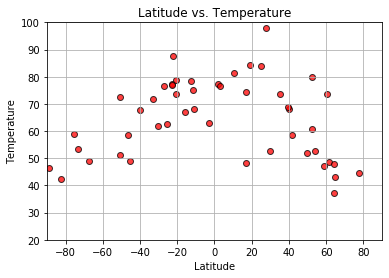

<Figure size 432x288 with 0 Axes>

In [82]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature")
plt.xlim(-90,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsTemp.png")

## Latitude vs. Humidity Plot

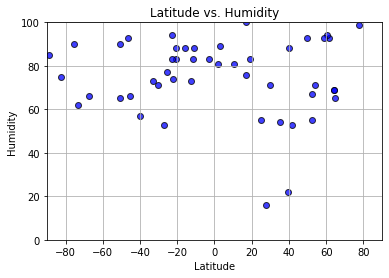

<Figure size 432x288 with 0 Axes>

In [83]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Humidity"]

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsHum.png")

## Latitude vs. Cloudiness Plot

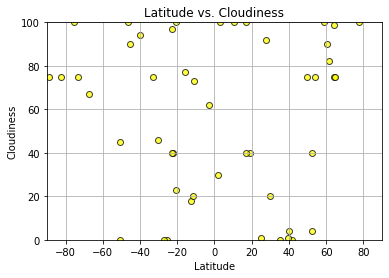

<Figure size 432x288 with 0 Axes>

In [84]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Cloudiness"]

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsCloud.png")

## Latitude vs. Wind Speed Plot

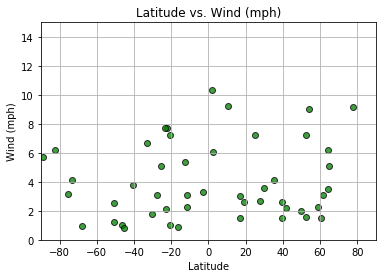

<Figure size 432x288 with 0 Axes>

In [85]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Wind (mph)"]

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph)")
plt.xlim(-90,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsWind.png")

## Linear Regression

In [86]:
#Exactly as above, but need to create two new DFs - north and south - and then just run all the same graphs out of them. Easy.

In [87]:
# split the dataframe into two dataframes, North and South
# Your second requirement is to run linear regression on 
# each relationship, only this time separating them into 
# Northern Hemisphere (greater than or equal to 0 degrees 
# latitude) and Southern Hemisphere (less than 0 degrees latitude):

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

south_df = new_cities.copy()
south_df = south_df.drop(south_df[south_df.lat >= 0].index)
south_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-57.673314,-22.152114,san lazaro,py,87.800,74,40,7.7
6,173.451391,-67.715329,bluff,nz,48.992,66,67,0.94
8,-54.010222,-88.718174,ushuaia,ar,46.400,85,75,5.7
10,130.719249,-30.128316,flinders,au,62.006,71,46,1.79
11,-21.849492,-22.726635,georgetown,sh,77.432,94,40,2.1
12,-112.531601,-11.262038,puerto ayora,ec,68.000,88,73,2.24
13,105.355245,-25.687312,carnarvon,au,62.600,77,0,5.1
16,56.218241,-20.686310,sainte-rose,re,78.800,88,23,1
17,-152.275133,-12.617523,faanui,pf,78.386,73,18,5.37
19,4.749327,-16.100997,namibe,ao,67.064,88,77,0.85


In [88]:
north_df = new_cities.copy()
north_df = north_df.drop(north_df[north_df.lat <= 0].index)
north_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
1,41.933857,61.758739,velsk,ru,48.686,93,82,3.11
2,-68.488943,64.276069,iqaluit,ca,37.202,69,75,6.2
3,165.455786,54.282085,nikolskoye,ru,52.844,71,75,9
4,5.786728,39.857704,mahon,es,68.000,88,4,1.5
5,-137.628290,52.305736,sitka,us,60.800,67,40,7.2
7,72.127038,10.709654,kavaratti,in,81.284,81,100,9.22
9,-128.650176,52.639745,kitimat,ca,80.006,55,4,1.54
14,49.893287,1.932355,hobyo,so,77.234,81,30,10.34
15,4.881126,16.818603,abalak,ne,48.326,76,100,2.99
18,53.730158,41.504616,zhanaozen,kz,58.424,53,0,2.2


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

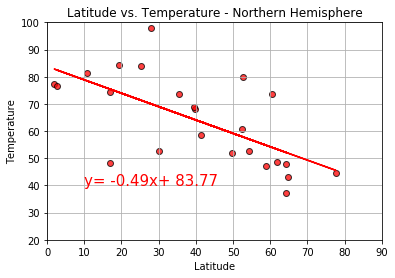

<Figure size 432x288 with 0 Axes>

In [89]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempNorth.png")

In [ ]:
#ANALYSIS: As latitude goes up, temperature goes down. IE: It gets colder further from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

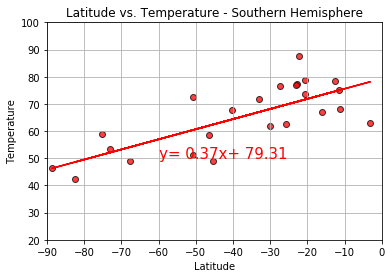

<Figure size 432x288 with 0 Axes>

In [90]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempSouth.png")

In [91]:
#ANALYSIS: The lower the latitude past the equator, the colder the temperature gets again. This proves that it is
#hotter at the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

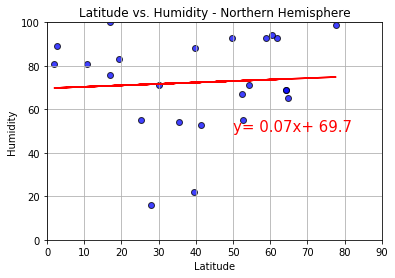

<Figure size 432x288 with 0 Axes>

In [92]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Humidity"]

data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

##add regression
#np.cov(label0.astype(float), rowvar=False)

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsHumNorth.png")

In [ ]:
#ANALYSIS: There is only a slight increase in humidity with latitude. 
#This suggests that there is a weak connection between the two.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

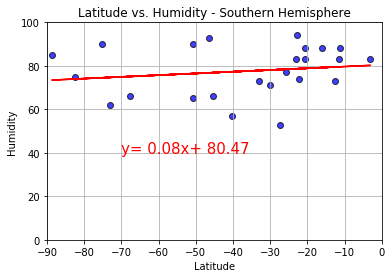

<Figure size 432x288 with 0 Axes>

In [93]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Humidity"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

plt.savefig("LatvsHumSouth.png")

In [94]:
#ANALYSIS: There is only a slight increase in humidity with latitude. 
#This suggests that there is a weak connection between the two.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

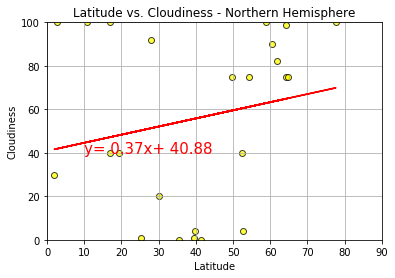

<Figure size 432x288 with 0 Axes>

In [95]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()
#save as png

plt.savefig("LatvsCloudNorth.png")

In [ ]:
#ANALYSIS: The data set of cloudiness is incredibly varied, suggesting
#there is very little connection between latitude and cloud cover.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

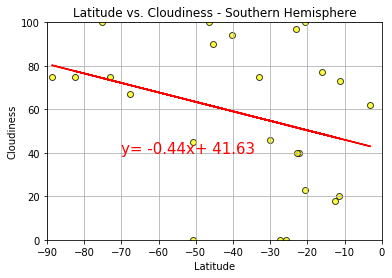

<Figure size 432x288 with 0 Axes>

In [96]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsCloudSouth.png")

In [97]:
#ANALYSIS: The data set of cloudiness is incredibly varied, suggesting
#there is very little connection between latitude and cloud cover.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

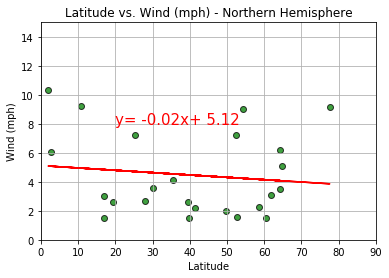

<Figure size 432x288 with 0 Axes>

In [98]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindNorth.png")

In [ ]:
#ANALYSIS: The data for wind speed at latitude does not have
#a very convincing regression line and suggests that there isn't much of a connection.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

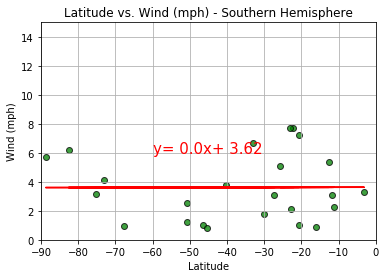

<Figure size 432x288 with 0 Axes>

In [99]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,6),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindSouth.png")

In [ ]:
#ANALYSIS: The data for wind speed at latitude does not have
#a very convincing regression line and suggests that there isn't much of a connection.